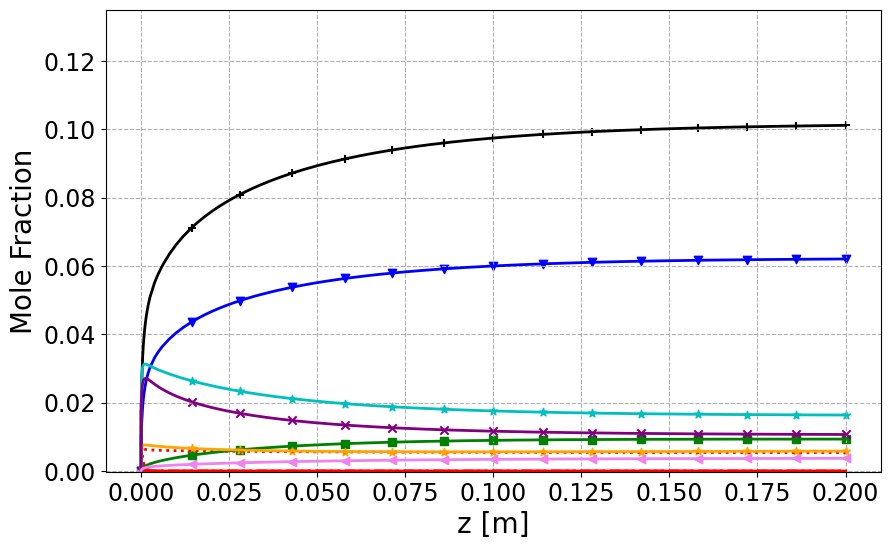

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import StrMethodFormatter



# CSV 파일 읽기
df = pd.read_csv('./data/1d_PP_2273K.csv')
#df = pd.read_csv('./data/export.csv')

# 모든 열을 숫자형으로 변환 (문자열이 포함되어 있으면 NaN 처리)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 데이터 컬럼 정보 (거리, 몰분율, 색상, 마커, 라벨, 선 스타일)
data_columns = [
    ('Distance_PFRC2 (cm)', 'Mole_fraction_IC12H26_PFRC2 ()', 'red', '', 'iso-$\\rm{C}_{12}\\rm{H}_{26}$', '-'),
    ('Distance_PFRC2 (cm)', 'Mole_fraction_NC10H20_PFRC2 ()', 'red', '', '1-$\\rm{C}_{10}\\rm{H}_{20}$', '--'),
    ('Distance_PFRC2 (cm)', 'Mole_fraction_IC8H16_PFRC2 ()', 'red', '', 'iso-$\\rm{C}_{8}\\rm{H}_{16}$', '-.'),
    ('Distance_PFRC2 (cm)', 'Mole_fraction_C7H8_PFRC2 ()', 'red', '', 'Toluene', ':'),
    ('Distance_PFRC2 (cm)', 'Mole_fraction_CH4_PFRC2 ()', 'black', '+', '$\\rm{CH}_4$', '-'),
    ('Distance_PFRC2 (cm)', 'Mole_fraction_C2H2_PFRC2 ()', 'green', 's', '$\\rm{C}_2\\rm{H}_2$', '-'),
    ('Distance_PFRC2 (cm)', 'Mole_fraction_C2H4_PFRC2 ()', 'blue', 'v', '$\\rm{C}_2\\rm{H}_4$', '-'),
    ('Distance_PFRC2 (cm)', 'Mole_fraction_C2H6_PFRC2 ()', 'orange', '*', '$\\rm{C}_2\\rm{H}_6$', '-'),
    ('Distance_PFRC2 (cm)', 'Mole_fraction_C3H6_PFRC2 ()', 'c', '*', '$\\rm{C}_3\\rm{H}_6$', '-'),
    #('Distance_PFRC2 (cm)', 'Mole_fraction_C4H6_PFRC2 ()', 'skyblue', '*', '$\\rm{C}_4\\rm{H}_6$', '-'),
    #('Distance_PFRC2 (cm)', 'Mole_fraction_IC4H7_PFRC2 ()', 'gold', '*', 'iso-$\\rm{C}_4\\rm{H}_{7}$', '-'),
    #('Distance_PFRC2 (cm)', 'Mole_fraction_C4H8-1_PFRC2 ()', 'olive', '*', '1-$\\rm{C}_4\\rm{H}_8$', '-'),
    ('Distance_PFRC2 (cm)', 'Mole_fraction_IC4H8_PFRC2 ()', 'purple', 'x', 'iso-$\\rm{C}_4\\rm{H}_{8}$', '-'),
    ('Distance_PFRC2 (cm)', 'Mole_fraction_C6H6_PFRC2 ()', 'violet', '<', '$\\rm{C}_6\\rm{H}_6$', '-'),
    #('Distance_PFRC2 (cm)', 'Mole_fraction_BIN1B_PFRC2 ()', 'gray', '*', '$\\rm{C}_{20}\\rm{H}_{10}$', '-'),
]

temperature_data = ('Distance_PFRC2 (cm)', 'Temperature_PFRC2 (K)', 'magenta', 'd', 'Temperature', '-')

# 플롯 설정
fig, ax1 = plt.subplots(figsize=(10, 6))

# 원하는 마커 개수
num_markers = 15  

# ──────────────────────────────
# 1) 화학종 데이터 (ax1)
# ──────────────────────────────
for time_col, mole_frac_col, color, marker, label, linestyle in data_columns:
    if mole_frac_col not in df.columns:
        ax1.plot([], [], color=color, marker=marker, linestyle=linestyle, label=label)
        continue

    x = df[time_col] / 100
    y = df[mole_frac_col]

    mask = x.notna() & y.notna()
    x, y = x[mask], y[mask]

    if len(x) > 0:
        x_unique, indices = np.unique(x, return_inverse=True)
        y_mean = np.array([y[indices == i].mean() for i in range(len(x_unique))])

        ax1.plot(x_unique, y_mean, color=color, linewidth=2, linestyle=linestyle)

        # 🔹 x 값 기준 균등 분할 마커
        x_min, x_max = x_unique.min(), x_unique.max()
        marker_positions = np.linspace(x_min, x_max, num=num_markers)
        marker_indices = [np.abs(x_unique - pos).argmin() for pos in marker_positions]

        ax1.scatter(x_unique[marker_indices], y_mean[marker_indices], color=color, marker=marker)

    ax1.plot([], [], color=color, marker=marker, linestyle=linestyle, label=label)


# ──────────────────────────────
# 2) 온도 데이터 (ax2)
# ──────────────────────────────
time_col, temp_col, color, marker, label, linestyle = temperature_data
x = df[time_col] / 100
y = df[temp_col]

mask = x.notna() & y.notna()
x, y = x[mask], y[mask]

if len(x) > 0:
    x_unique, indices = np.unique(x, return_inverse=True)
    y_mean = np.array([y[indices == i].mean() for i in range(len(x_unique))])

    ax2.plot(x_unique, y_mean, color=color, linewidth=2, linestyle=linestyle)

    # 🔹 x 값 기준 균등 분할 마커
    x_min, x_max = x_unique.min(), x_unique.max()
    marker_positions = np.linspace(x_min, x_max, num=num_markers)
    marker_indices = [np.abs(x_unique - pos).argmin() for pos in marker_positions]

    ax2.scatter(x_unique[marker_indices], y_mean[marker_indices], color=color, marker=marker)

ax1.plot([], [], color=color, marker=marker, linestyle=linestyle, label=label)


# 축 라벨, 범위 등 설정
ax1.set_xlabel('z [m]', fontsize=20)
ax1.set_ylabel('Mole Fraction', fontsize=20)
ax2.set_ylabel('Temperature [K]', fontsize=20)

ax1.tick_params(axis='x', labelsize=17)
ax1.tick_params(axis='y', labelsize=17)
ax2.tick_params(axis='y', labelsize=17)
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # 천단위 온점 표시

ax1.set_ylim(-0.0002, 0.135)
ax2.set_ylim(850, 1900)

ax1.grid(True, which='both', linestyle='--')


# 범례 설정
#custom_lines = [Line2D([0], [0], color=color, marker=marker, linestyle=linestyle, label=label) 
#                for _, _, color, marker, label, linestyle in data_columns + [temperature_data]]
#ax1.legend(handles=custom_lines, loc='upper right', bbox_to_anchor=(0.22, 0.95), prop={'size': 10})

# 저장 및 출력
plt.savefig('./fig/1D_PP_2273K.pdf', bbox_inches='tight')
plt.show()


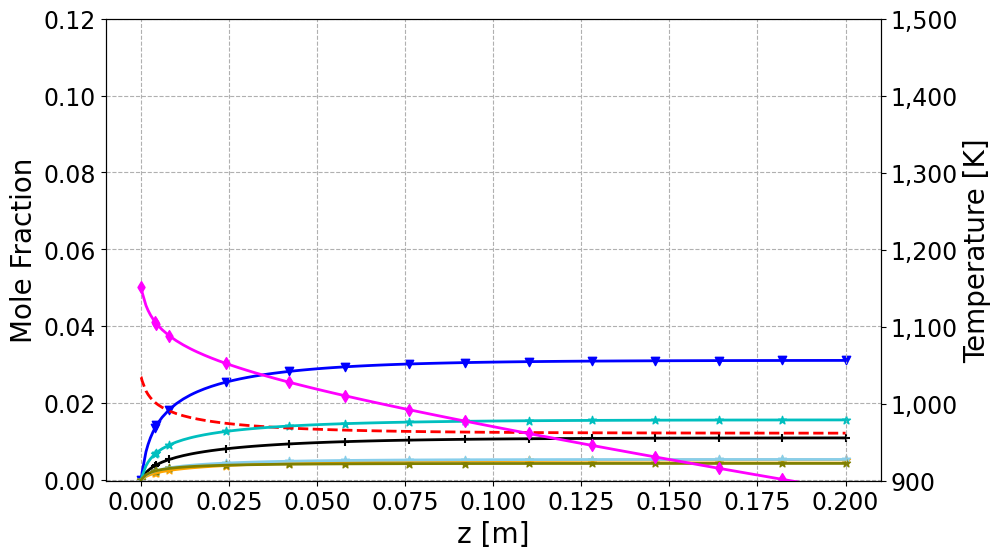

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import StrMethodFormatter



# CSV 파일 읽기
df = pd.read_csv('./data/1d_PP_2773K.csv')
#df = pd.read_csv('./data/export.csv')

# 모든 열을 숫자형으로 변환 (문자열이 포함되어 있으면 NaN 처리)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 데이터 컬럼 정보 (거리, 몰분율, 색상, 마커, 라벨, 선 스타일)
data_columns = [
    #('Distance (cm)', 'Mole_fraction_IC12H26 ()', 'red', '', 'iso-$\\rm{C}_{12}\\rm{H}_{26}$', '-'),
    ('Distance (cm)', 'Mole_fraction_NC10H20 ()', 'red', '', '1-$\\rm{C}_{10}\\rm{H}_{20}$', '--'),
    #('Distance (cm)', 'Mole_fraction_IC8H16 ()', 'red', '', 'iso-$\\rm{C}_{8}\\rm{H}_{16}$', '-.'),
    #('Distance (cm)', 'Mole_fraction_C7H8 ()', 'red', '', 'Toluene', ':'),
    ('Distance (cm)', 'Mole_fraction_CH4 ()', 'black', '+', '$\\rm{CH}_4$', '-'),
    #('Distance (cm)', 'Mole_fraction_C2H2 ()', 'green', 's', '$\\rm{C}_2\\rm{H}_2$', '-'),
    ('Distance (cm)', 'Mole_fraction_C2H4 ()', 'blue', 'v', '$\\rm{C}_2\\rm{H}_4$', '-'),
    ('Distance (cm)', 'Mole_fraction_C2H6 ()', 'orange', '*', '$\\rm{C}_2\\rm{H}_6$', '-'),
    ('Distance (cm)', 'Mole_fraction_C3H6 ()', 'c', '*', '$\\rm{C}_3\\rm{H}_6$', '-'),
    ('Distance (cm)', 'Mole_fraction_C4H6 ()', 'skyblue', '*', '$\\rm{C}_4\\rm{H}_6$', '-'),
    #('Distance (cm)', 'Mole_fraction_IC4H7 ()', 'gold', '*', 'iso-$\\rm{C}_4\rm{H}_{7}$', '-'),
    ('Distance (cm)', 'Mole_fraction_C4H8-1 ()', 'olive', '*', '1-$\\rm{C}_4\\rm{H}_8$', '-'),
    #('Distance (cm)', 'Mole_fraction_IC4H8 ()', 'yellow', '*', 'iso-$\\rm{C}_4\\rm{H}_{8}$', '-'),
    #('Distance (cm)', 'Mole_fraction_C6H6 ()', 'violet', '^', '$\\rm{C}_6\\rm{H}_6$', '-'),
    #('Distance_PFRC2 (cm)', 'Mole_fraction_BIN1B_PFRC2 ()', 'gray', '*', '$\\rm{C}_{20}\\rm{H}_{10}$', '-'),
]

temperature_data = ('Distance (cm)', 'Temperature (K)', 'magenta', 'd', 'Temperature', '-')

# 플롯 설정
fig, ax1 = plt.subplots(figsize=(10, 6))

# 각 화학종 데이터 플롯
for time_col, mole_frac_col, color, marker, label, linestyle in data_columns:
    x = df[time_col] / 100  # cm → m
    y = df[mole_frac_col]

    # 결측값 제거
    mask = x.notna() & y.notna()
    x = x[mask]
    y = y[mask]

    if len(x) == 0 or len(y) == 0:
        continue

    # 중복 제거 및 평균화
    x_unique, indices = np.unique(x, return_inverse=True)
    y_mean = np.array([y[indices == i].mean() for i in range(len(x_unique))])

    # 그래프 그리기
    ax1.plot(x_unique, y_mean, color=color, linewidth=2, linestyle=linestyle)

    # 마커는 총 10개만 균등하게 표시
    marker_indices = np.linspace(0, len(x_unique) - 1, num=15, dtype=int)
    ax1.scatter(x_unique[marker_indices], y_mean[marker_indices], color=color, marker=marker)

# 온도 데이터는 오른쪽 축에 표시
ax2 = ax1.twinx()
time_col, temp_col, color, marker, label, linestyle = temperature_data

x = df[time_col] / 100  # cm → m
y = df[temp_col]

mask = x.notna() & y.notna()
x = x[mask]
y = y[mask]

x_unique, indices = np.unique(x, return_inverse=True)
y_mean = np.array([y[indices == i].mean() for i in range(len(x_unique))])

# 선 그래프
ax2.plot(x_unique, y_mean, color=color, linewidth=2, linestyle=linestyle)

# 마커 10개만 표시
marker_indices = np.linspace(0, len(x_unique) - 1, num=15, dtype=int)
ax2.scatter(x_unique[marker_indices], y_mean[marker_indices], color=color, marker=marker)

# 축 라벨, 범위 등 설정
ax1.set_xlabel('z [m]', fontsize=20)
ax1.set_ylabel('Mole Fraction', fontsize=20)
ax2.set_ylabel('Temperature [K]', fontsize=20)

ax1.tick_params(axis='x', labelsize=17)
ax1.tick_params(axis='y', labelsize=17)
ax2.tick_params(axis='y', labelsize=17)
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # 천단위 온점 표시

ax1.set_ylim(-0.0002, 0.12)
ax2.set_ylim(900, 1500)

ax1.grid(True, which='both', linestyle='--')


# 범례 설정
#custom_lines = [Line2D([0], [0], color=color, marker=marker, linestyle=linestyle, label=label) 
#                for _, _, color, marker, label, linestyle in data_columns + [temperature_data]]
#ax1.legend(handles=custom_lines, loc='upper right', bbox_to_anchor=(1.45, 1.0), prop={'size': 14})

# 저장 및 출력
plt.savefig('./fig/1D_PP_2773K.pdf', bbox_inches='tight')
plt.show()
